### Activity 3 (Wednesday)


As a reminder the objective of this study is to predict the **total claim amount** of a customer and study/investigate the impact of the factors (input features) on the target variable(**total_claim_amount**). That means in your exploratory data analysis, you have to look for patterns in this data that show interesting relationships among the input features as well as with relation to the target feature.

- Get the numeric data into a dataframe called **numerical** and **categorical** columns in a dataframe called categorical. (You can use "np.number" and "object" to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use the Seaborn library to construct distribution plots for the numerical variables
    - Use the Matplotlib library to construct histograms.
    - Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("marketing_customer_analysis_3.csv")
#df.drop_duplicates(inplace=True)

In [172]:
numerical = df.select_dtypes(include=np.number)
categorical = df.select_dtypes(include=object)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


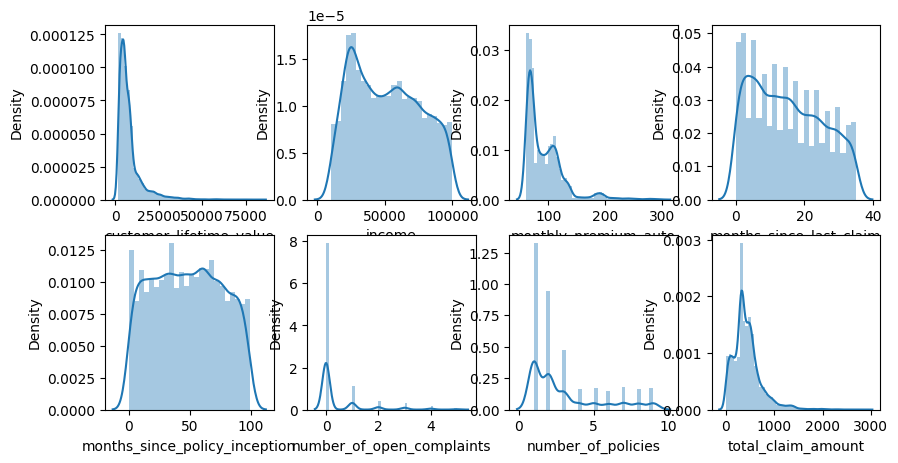

In [173]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

n_rows=2
n_cols=4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,5))

for i, column in enumerate(numerical.columns):
    #sns.histplot(numerical[column], ax=axes[i//n_cols,i%n_cols], kde = True)
    sns.distplot(numerical[column], ax=axes[i//n_cols,i%n_cols])

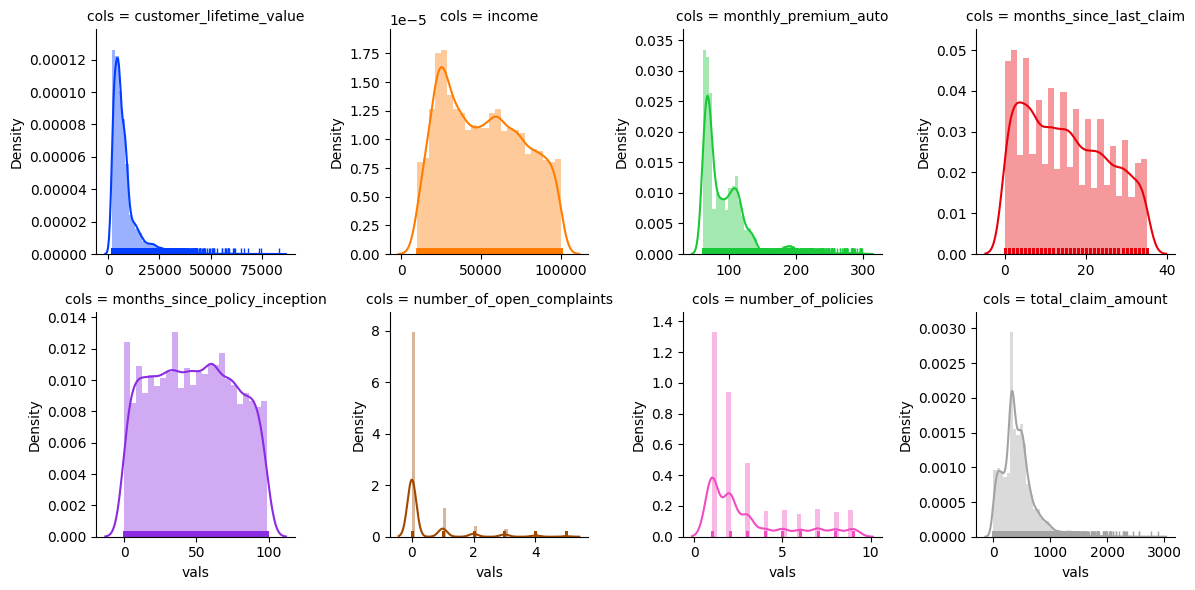

In [174]:
num_df = numerical.copy()
num_df['id_var'] = 1
num_df = num_df.melt(['id_var'], var_name='cols', value_name='vals')

f = sns.FacetGrid(num_df, col='cols', hue="cols", palette=sns.color_palette('bright'), sharex=False, sharey=False, col_wrap=4)
f = (f.map(sns.distplot, "vals", hist=True, rug=True))

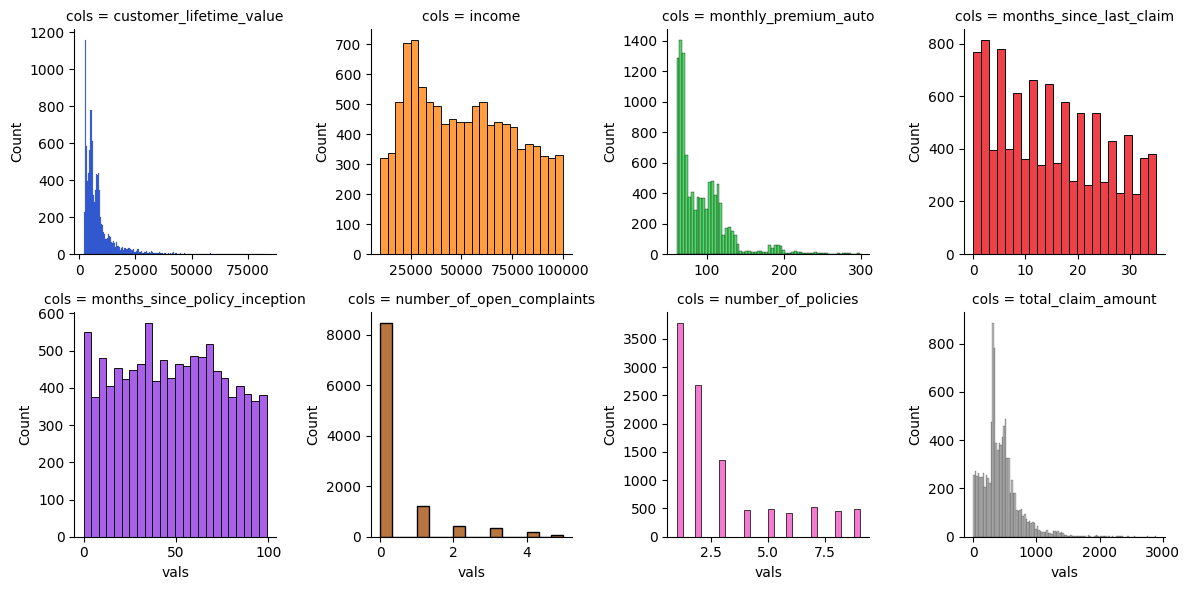

In [175]:
g = sns.FacetGrid(num_df, col='cols', hue="cols", palette=sns.color_palette('bright'), sharex=False, sharey=False, col_wrap=4)
g = (g.map(sns.histplot, "vals"))

<Axes: >

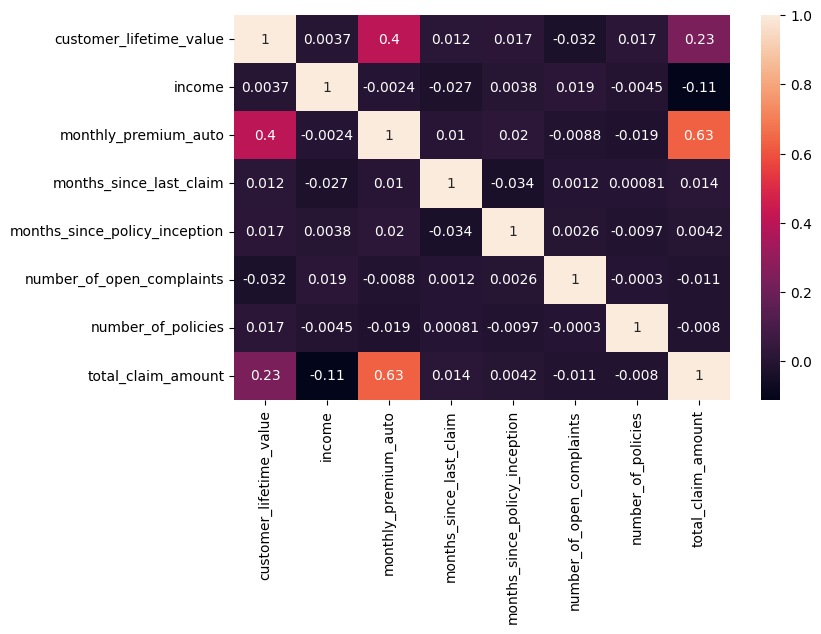

In [176]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

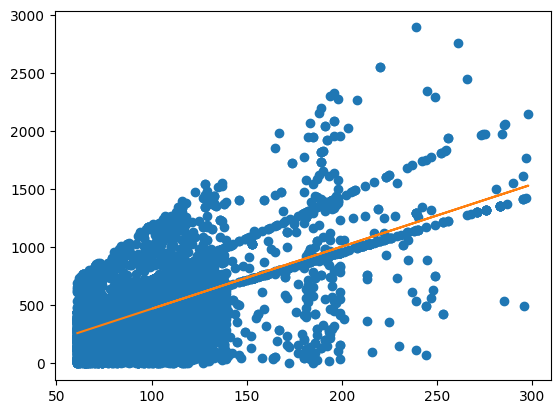

In [177]:
# Visualize the correlation between monthly_premium_auto and total_claim_amount with scatter plot

x = np.array(numerical['monthly_premium_auto'])
y = np.array(numerical['total_claim_amount'])

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)


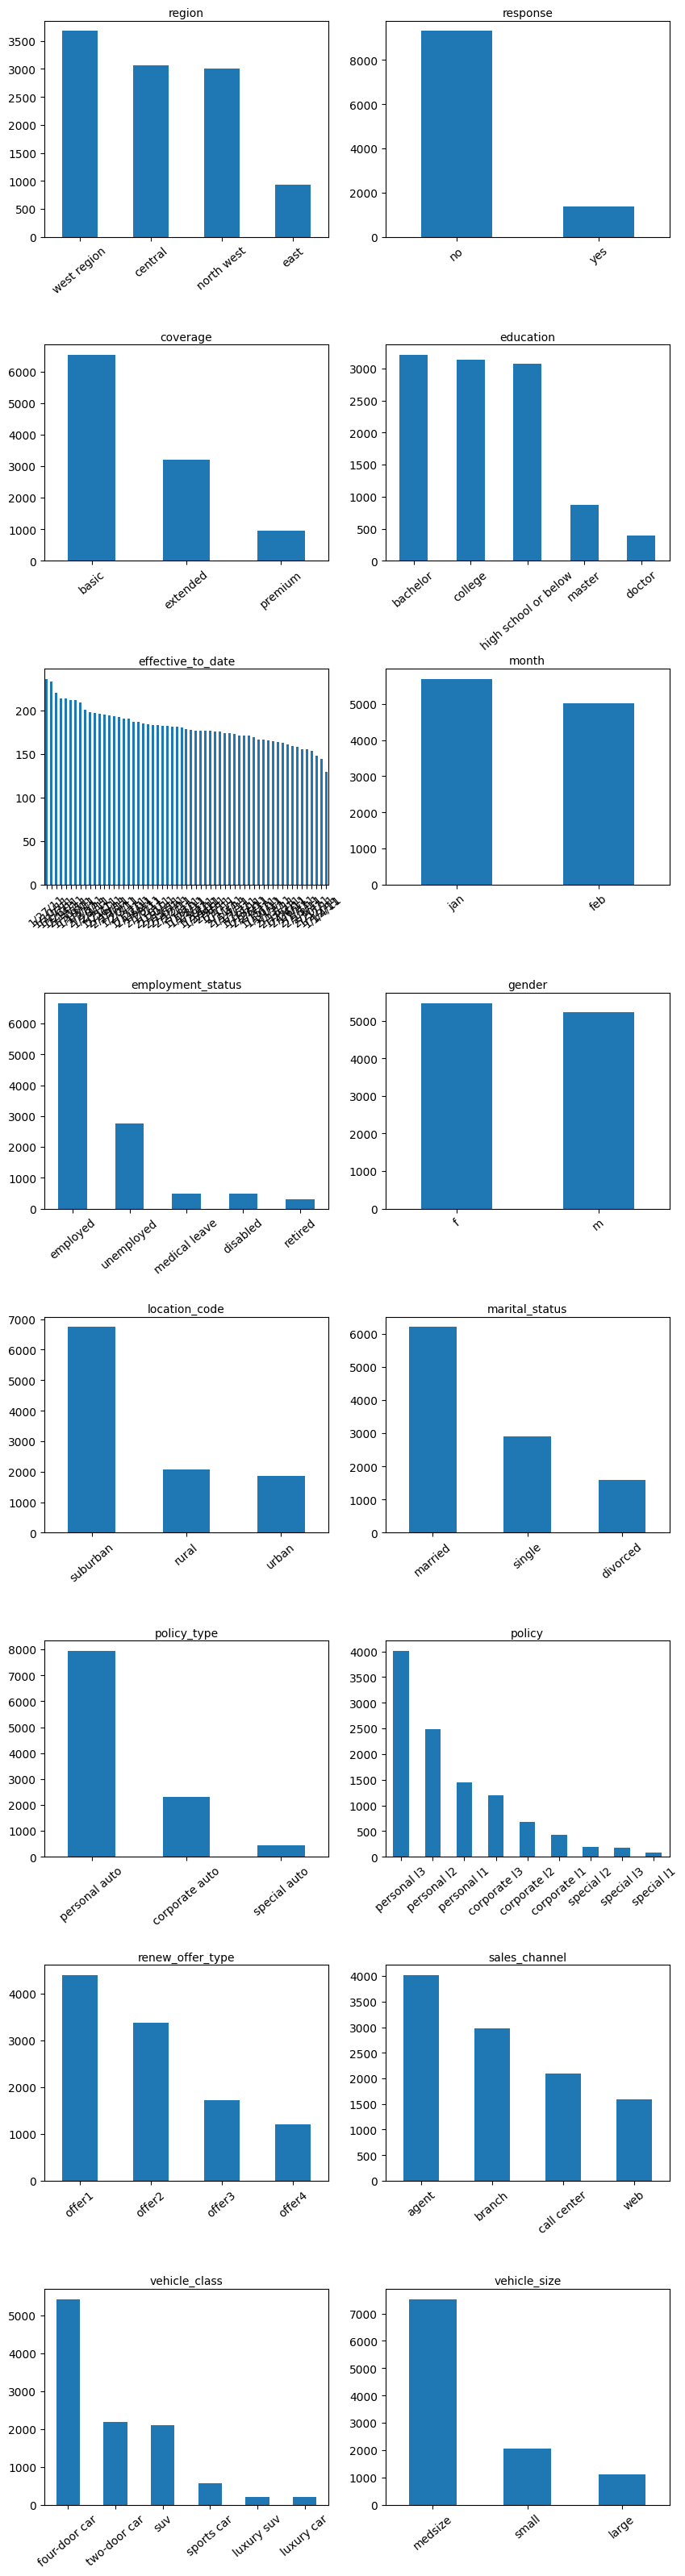

In [179]:
# Visualize the categorical data
n_rows=8
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,40))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(categorical.columns):
    axes[i//2,i%2].xaxis.set_label_position('top')
    categorical[column].value_counts().plot(kind='bar', ax=axes[i//n_cols,i%n_cols], rot=40)
